In [21]:
# Import the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from scipy.stats import chi2_contingency, ttest_ind
import os

# Dataset Overview
The dataset comprises the following key features:

Demographic information: Age, Gender
Lifestyle factors: Smoking Status (Current, Former, Never), Biomass Fuel Exposure (0 or 1), Occupational Exposure (0 or 1)
Medical history: Family History of COPD (0 or 1), Respiratory Infections in Childhood (0 or 1)
Health indicators: BMI
Environmental factors: Location (10 different cities in Nepal), Air Pollution Level
Target variable: COPD Diagnosis (0 = No COPD, 1 = COPD)

# Exploratory Data Analysis (EDA) 
Prevalence: Determine the overall prevalence of COPD in the dataset.

Risk Factors: Analyze the distribution of various risk factors (e.g., smoking status, biomass fuel exposure) and their association with COPD diagnosis.

Demographics: Examine the relationship between demographic factors (age, gender) and COPD.

Environmental Impact: Explore the influence of location and air pollution levels on COPD prevalence.

Health Indicators: Assess the correlation between BMI and COPD diagnosis.

EDA Approach
We will utilize descriptive statistics, visualizations, and potentially statistical tests to unveil patterns and relationships within the data. 

The following types of visualizations will be employed:

Bar plots and count plots: To visualize the distribution of categorical variables and their association with COPD diagnosis.

Histograms: To understand the distribution of numerical variables like age, BMI, and air pollution levels.

Box plots: To compare the distributions of numerical variables across different categories (e.g., COPD diagnosis vs. no COPD).
Scatter plots: To examine the relationship between pairs of numerical variables.

In [22]:
df = pd.read_csv(r'C:\Users\awasthi\Documents\COPD_Risk_Factors_Nepal\COPD_Data_Nepal.csv')
df.head()

Age  Gender Smoking_Status  Biomass_Fuel_Exposure  Occupational_Exposure  \
0   31    Male         Former                      1                      1   
1   60    Male          Never                      1                      0   
2   33    Male         Former                      0                      0   
3   36  Female        Current                      1                      0   
4   58    Male          Never                      0                      0   

   Family_History_COPD    BMI   Location  Air_Pollution_Level  \
0                    1  27.56   Lalitpur                   84   
1                    0  30.30    Pokhara                  131   
2                    1  28.45    Pokhara                  123   
3                    0  27.49  Kathmandu                  253   
4                    0  25.49    Pokhara                  117   

   Respiratory_Infections_Childhood  COPD_Diagnosis  
0                                 0               0  
1                                 1               0  
2                                 1               0  
3                                 0               1  
4                                 1               0

In [23]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

| Age   | Gender   | Smoking_Status   | Biomass_Fuel_Exposure   | Occupational_Exposure   | Family_History_COPD   | BMI   | Location   | Air_Pollution_Level   | Respiratory_Infections_Childhood   | COPD_Diagnosis   |
|:------|:---------|:-----------------|:------------------------|:------------------------|:----------------------|:------|:-----------|:----------------------|:-----------------------------------|:-----------------|
| 31    | Male     | Former           | 1                       | 1                       | 1                     | 27.56 | Lalitpur   | 84                    | 0                                  | 0                |
| 60    | Male     | Never            | 1                       | 0                       | 0                     | 30.3  | Pokhara    | 131                   | 1                                  | 0                |
| 33    | Male     | Former           | 0                       | 0                       | 1                     | 28.45 | Pokhara 

In [24]:
df_info = df.info()
df_head = df.head()
df_description = df.describe()
df_null = df.isnull().sum()

df_info, df_head, df_description, df_null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1800 non-null   int64  
 1   Gender                            1800 non-null   object 
 2   Smoking_Status                    1800 non-null   object 
 3   Biomass_Fuel_Exposure             1800 non-null   int64  
 4   Occupational_Exposure             1800 non-null   int64  
 5   Family_History_COPD               1800 non-null   int64  
 6   BMI                               1800 non-null   float64
 7   Location                          1800 non-null   object 
 8   Air_Pollution_Level               1800 non-null   int64  
 9   Respiratory_Infections_Childhood  1800 non-null   int64  
 10  COPD_Diagnosis                    1800 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 154.8+ KB


(None,
    Age  Gender Smoking_Status  Biomass_Fuel_Exposure  Occupational_Exposure  \
 0   31    Male         Former                      1                      1   
 1   60    Male          Never                      1                      0   
 2   33    Male         Former                      0                      0   
 3   36  Female        Current                      1                      0   
 4   58    Male          Never                      0                      0   
 
    Family_History_COPD    BMI   Location  Air_Pollution_Level  \
 0                    1  27.56   Lalitpur                   84   
 1                    0  30.30    Pokhara                  131   
 2                    1  28.45    Pokhara                  123   
 3                    0  27.49  Kathmandu                  253   
 4                    0  25.49    Pokhara                  117   
 
    Respiratory_Infections_Childhood  COPD_Diagnosis  
 0                                 0               0  
 1 

C:\Users\awasthi\AppData\Local\Temp\ipykernel_15648\2675862775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


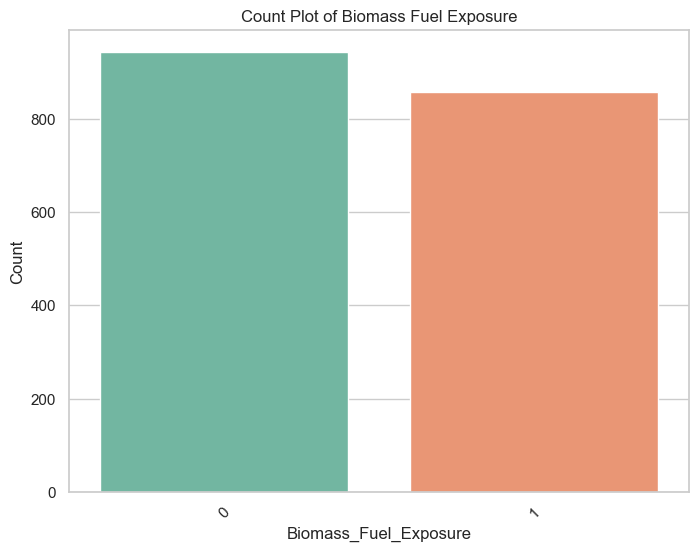

C:\Users\awasthi\AppData\Local\Temp\ipykernel_15648\2675862775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


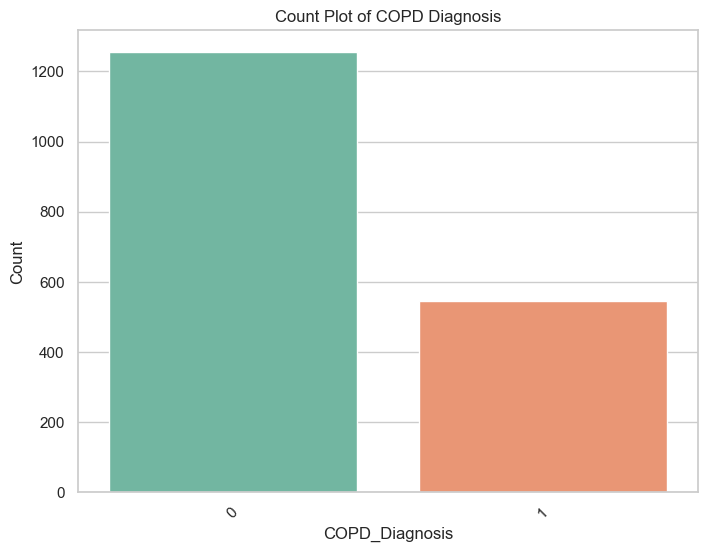

C:\Users\awasthi\AppData\Local\Temp\ipykernel_15648\2675862775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


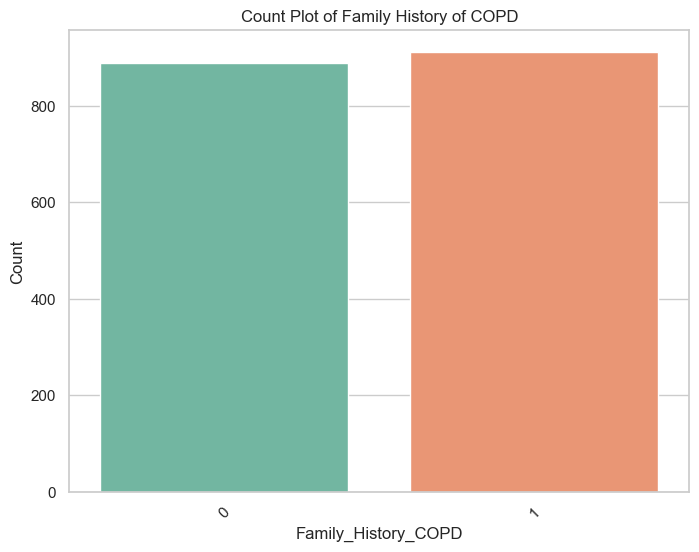

C:\Users\awasthi\AppData\Local\Temp\ipykernel_15648\2675862775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


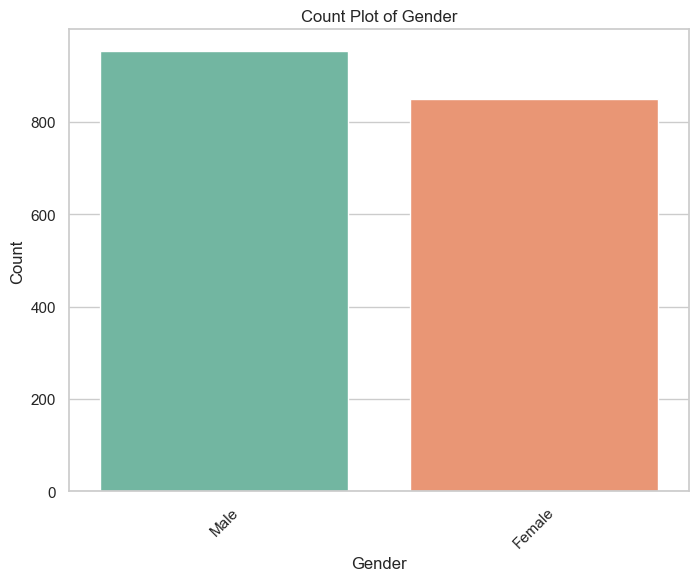

C:\Users\awasthi\AppData\Local\Temp\ipykernel_15648\2675862775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


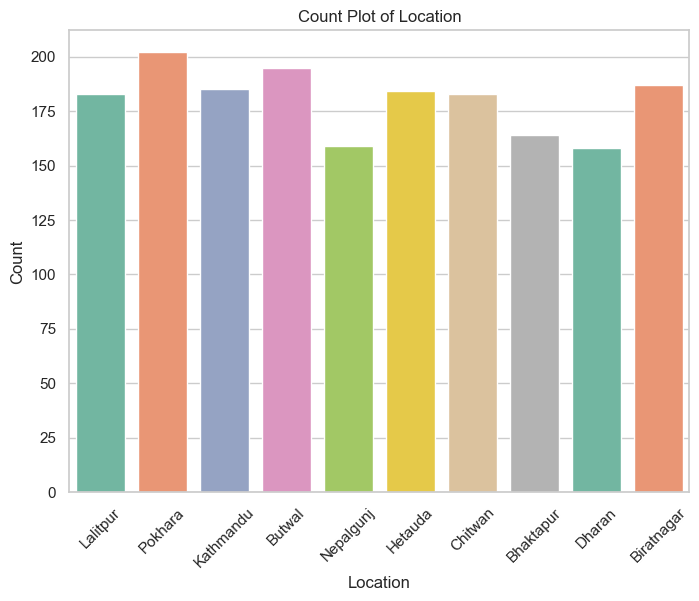

C:\Users\awasthi\AppData\Local\Temp\ipykernel_15648\2675862775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


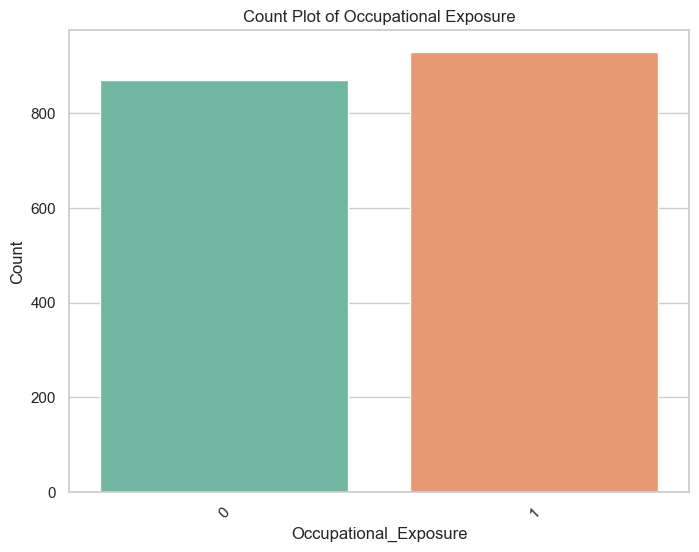

C:\Users\awasthi\AppData\Local\Temp\ipykernel_15648\2675862775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


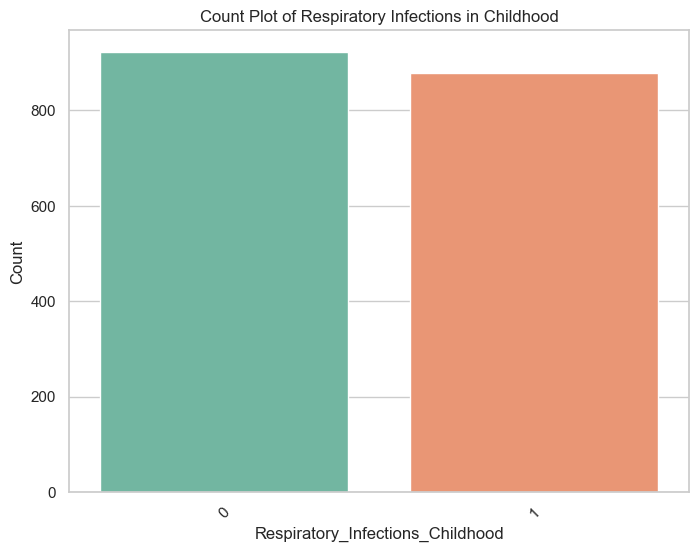

C:\Users\awasthi\AppData\Local\Temp\ipykernel_15648\2675862775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


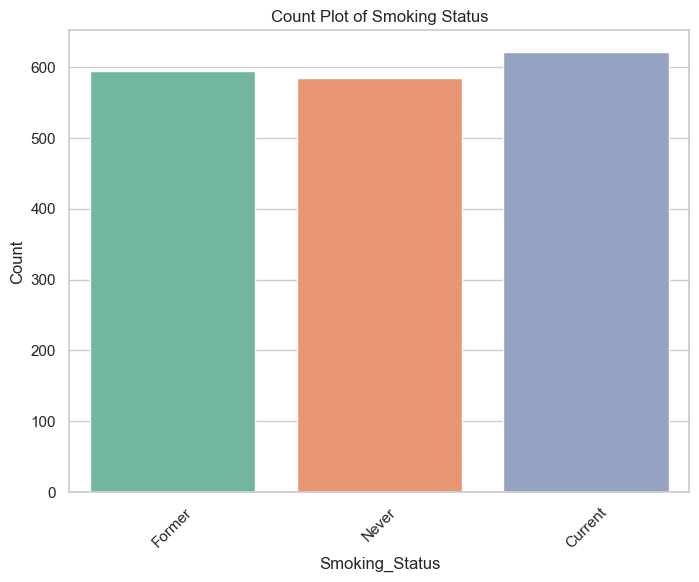

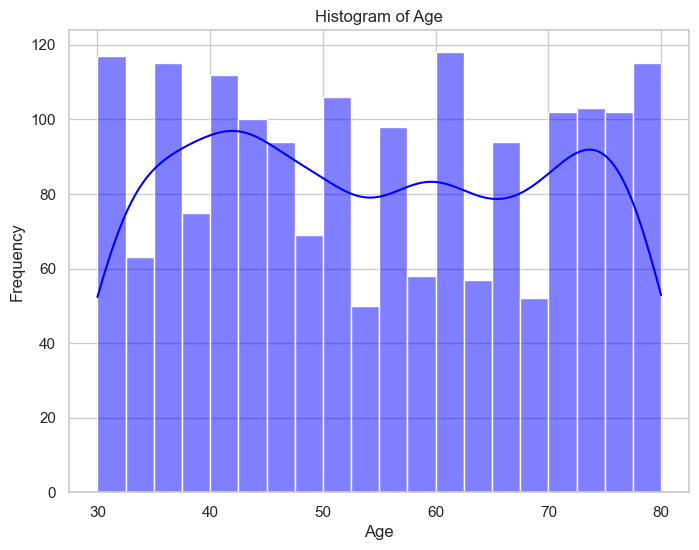

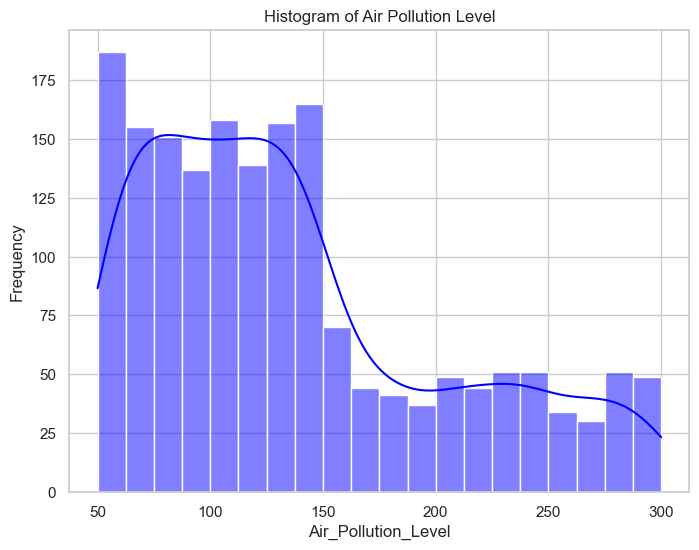

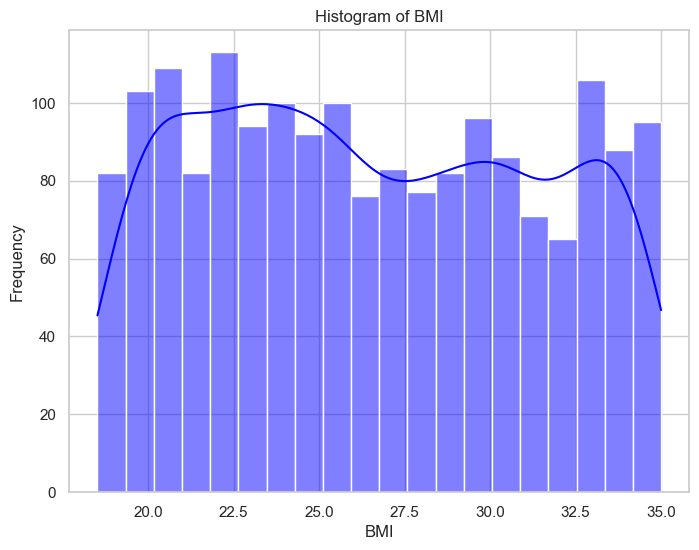

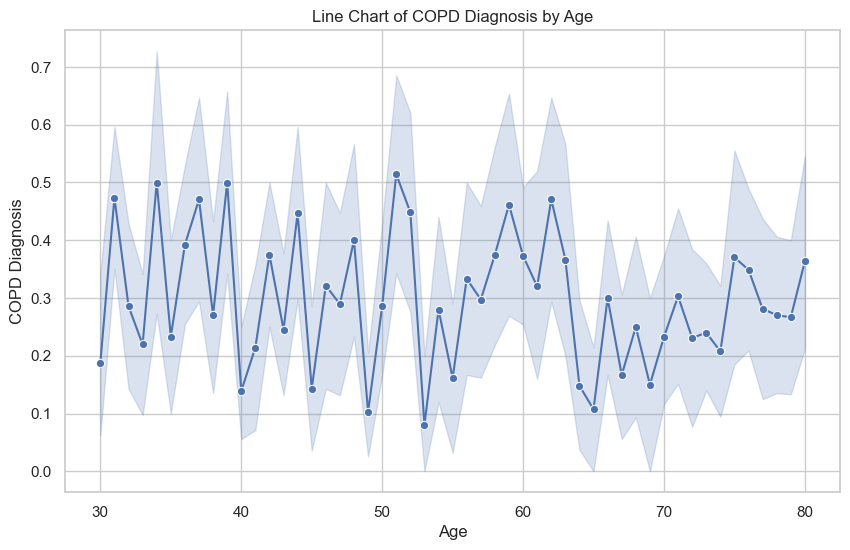

<Figure size 1000x600 with 0 Axes>

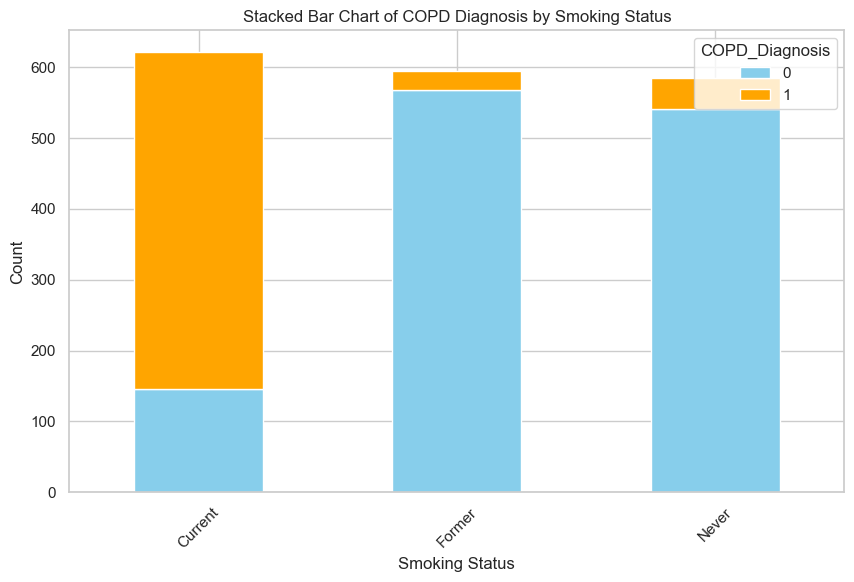

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Function to create count plots for categorical variables
def create_count_plot(df, column, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, palette="Set2")
    plt.title(title)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Count plots for categorical variables
create_count_plot(df, 'Biomass_Fuel_Exposure', 'Count Plot of Biomass Fuel Exposure')
create_count_plot(df, 'COPD_Diagnosis', 'Count Plot of COPD Diagnosis')
create_count_plot(df, 'Family_History_COPD', 'Count Plot of Family History of COPD')
create_count_plot(df, 'Gender', 'Count Plot of Gender')
create_count_plot(df, 'Location', 'Count Plot of Location')
create_count_plot(df, 'Occupational_Exposure', 'Count Plot of Occupational Exposure')
create_count_plot(df, 'Respiratory_Infections_Childhood', 'Count Plot of Respiratory Infections in Childhood')
create_count_plot(df, 'Smoking_Status', 'Count Plot of Smoking Status')

# Histograms for continuous variables
def create_histogram(df, column, title):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color="blue", bins=20)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Histograms for continuous variables
create_histogram(df, 'Age', 'Histogram of Age')
create_histogram(df, 'Air_Pollution_Level', 'Histogram of Air Pollution Level')
create_histogram(df, 'BMI', 'Histogram of BMI')

# Line chart for COPD diagnosis by age
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='COPD_Diagnosis', data=df, marker='o')
plt.title('Line Chart of COPD Diagnosis by Age')
plt.xlabel('Age')
plt.ylabel('COPD Diagnosis')
plt.show()

# Stacked bar chart for COPD diagnosis by smoking status
plt.figure(figsize=(10, 6))
smoking_copd = pd.crosstab(df['Smoking_Status'], df['COPD_Diagnosis'])
smoking_copd.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(10, 6))
plt.title('Stacked Bar Chart of COPD Diagnosis by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [26]:
import pandas as pd
import altair as alt
from IPython.display import display


# Function to create count plots
def create_count_plot(df, column_name):
  chart = alt.Chart(df).mark_bar().encode(
      x=alt.X(column_name, axis=alt.Axis(title=column_name)),
      y=alt.Y('count()', axis=alt.Axis(title='Count')),
      tooltip=[column_name, 'count()']
  ).properties(
      title=f'Count Plot of {column_name}'
  ).interactive()
  return chart

# Function to create histograms
def create_histogram(df, column_name):
  chart = alt.Chart(df).mark_bar().encode(
      x=alt.X(column_name, bin=True, axis=alt.Axis(title=column_name)),
      y=alt.Y('count()', axis=alt.Axis(title='Count')),
      tooltip=[alt.Tooltip(column_name, bin=True), 'count()']
  ).properties(
      title=f'Histogram of {column_name}'
  ).interactive()
  return chart

# Columns for count plots and histograms
count_plot_columns = ['Biomass_Fuel_Exposure', 'COPD_Diagnosis', 'Family_History_COPD', 'Gender', 'Location', 'Occupational_Exposure', 'Respiratory_Infections_Childhood', 'Smoking_Status']
histogram_columns = ['Age', 'Air_Pollution_Level', 'BMI']

# Create and display count plots
for column in count_plot_columns:
    chart = create_count_plot(df, column)
    display(chart)

# Create and display histograms
for column in histogram_columns:
    chart = create_histogram(df, column)
    display(chart)

# Group the data by `Age` and calculate the mean of `COPD_Diagnosis`
copd_by_age = df.groupby('Age')['COPD_Diagnosis'].mean().reset_index()

# Create a line chart with `Age` on the x-axis and the proportion of COPD on the y-axis
chart = alt.Chart(copd_by_age).mark_line(point=True).encode(
    x=alt.X('Age', axis=alt.Axis(title='Age')),
    y=alt.Y('COPD_Diagnosis', axis=alt.Axis(title='Proportion of COPD')),
    tooltip=['Age', 'COPD_Diagnosis']
).properties(
    title='Proportion of COPD by Age'
).interactive()

# Display the line chart
display(chart)

# Create a crosstab between `Smoking_Status` and `COPD_Diagnosis`
copd_by_smoking = pd.crosstab(df['Smoking_Status'], df['COPD_Diagnosis'])

# Normalize the crosstab across rows to get proportions
copd_by_smoking_normalized = copd_by_smoking.div(copd_by_smoking.sum(axis=1), axis=0)

# Melt the DataFrame to long format for plotting
copd_by_smoking_melted = copd_by_smoking_normalized.reset_index().melt('Smoking_Status', var_name='COPD_Diagnosis', value_name='Proportion')

# Create a stacked bar chart 
chart = alt.Chart(copd_by_smoking_melted).mark_bar().encode(
    x=alt.X('Smoking_Status', axis=alt.Axis(title='Smoking Status')),
    y=alt.Y('Proportion', axis=alt.Axis(title='Proportion'), stack='normalize'),
    color=alt.Color('COPD_Diagnosis', title='COPD Diagnosis'),
    tooltip=['Smoking_Status', 'COPD_Diagnosis', 'Proportion']
).properties(
    title='Stacked Bar Chart of COPD by Smoking'
).interactive()

# Display the stacked bar chart
display(chart)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

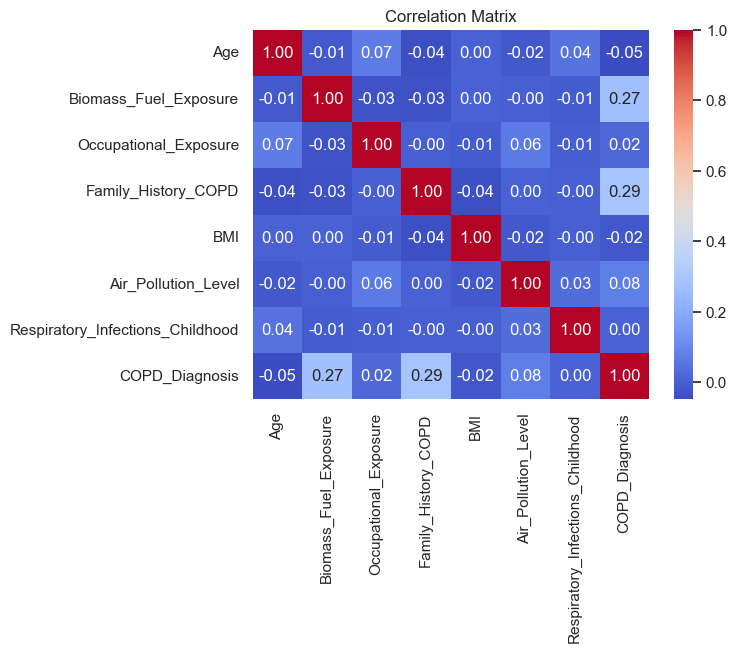

In [27]:
# COrrelation Matrix
data_corr = df[['Age', 'Biomass_Fuel_Exposure', 'Occupational_Exposure', 'Family_History_COPD', 'BMI', 'Air_Pollution_Level', 'Respiratory_Infections_Childhood', 'COPD_Diagnosis']]
corr = data_corr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

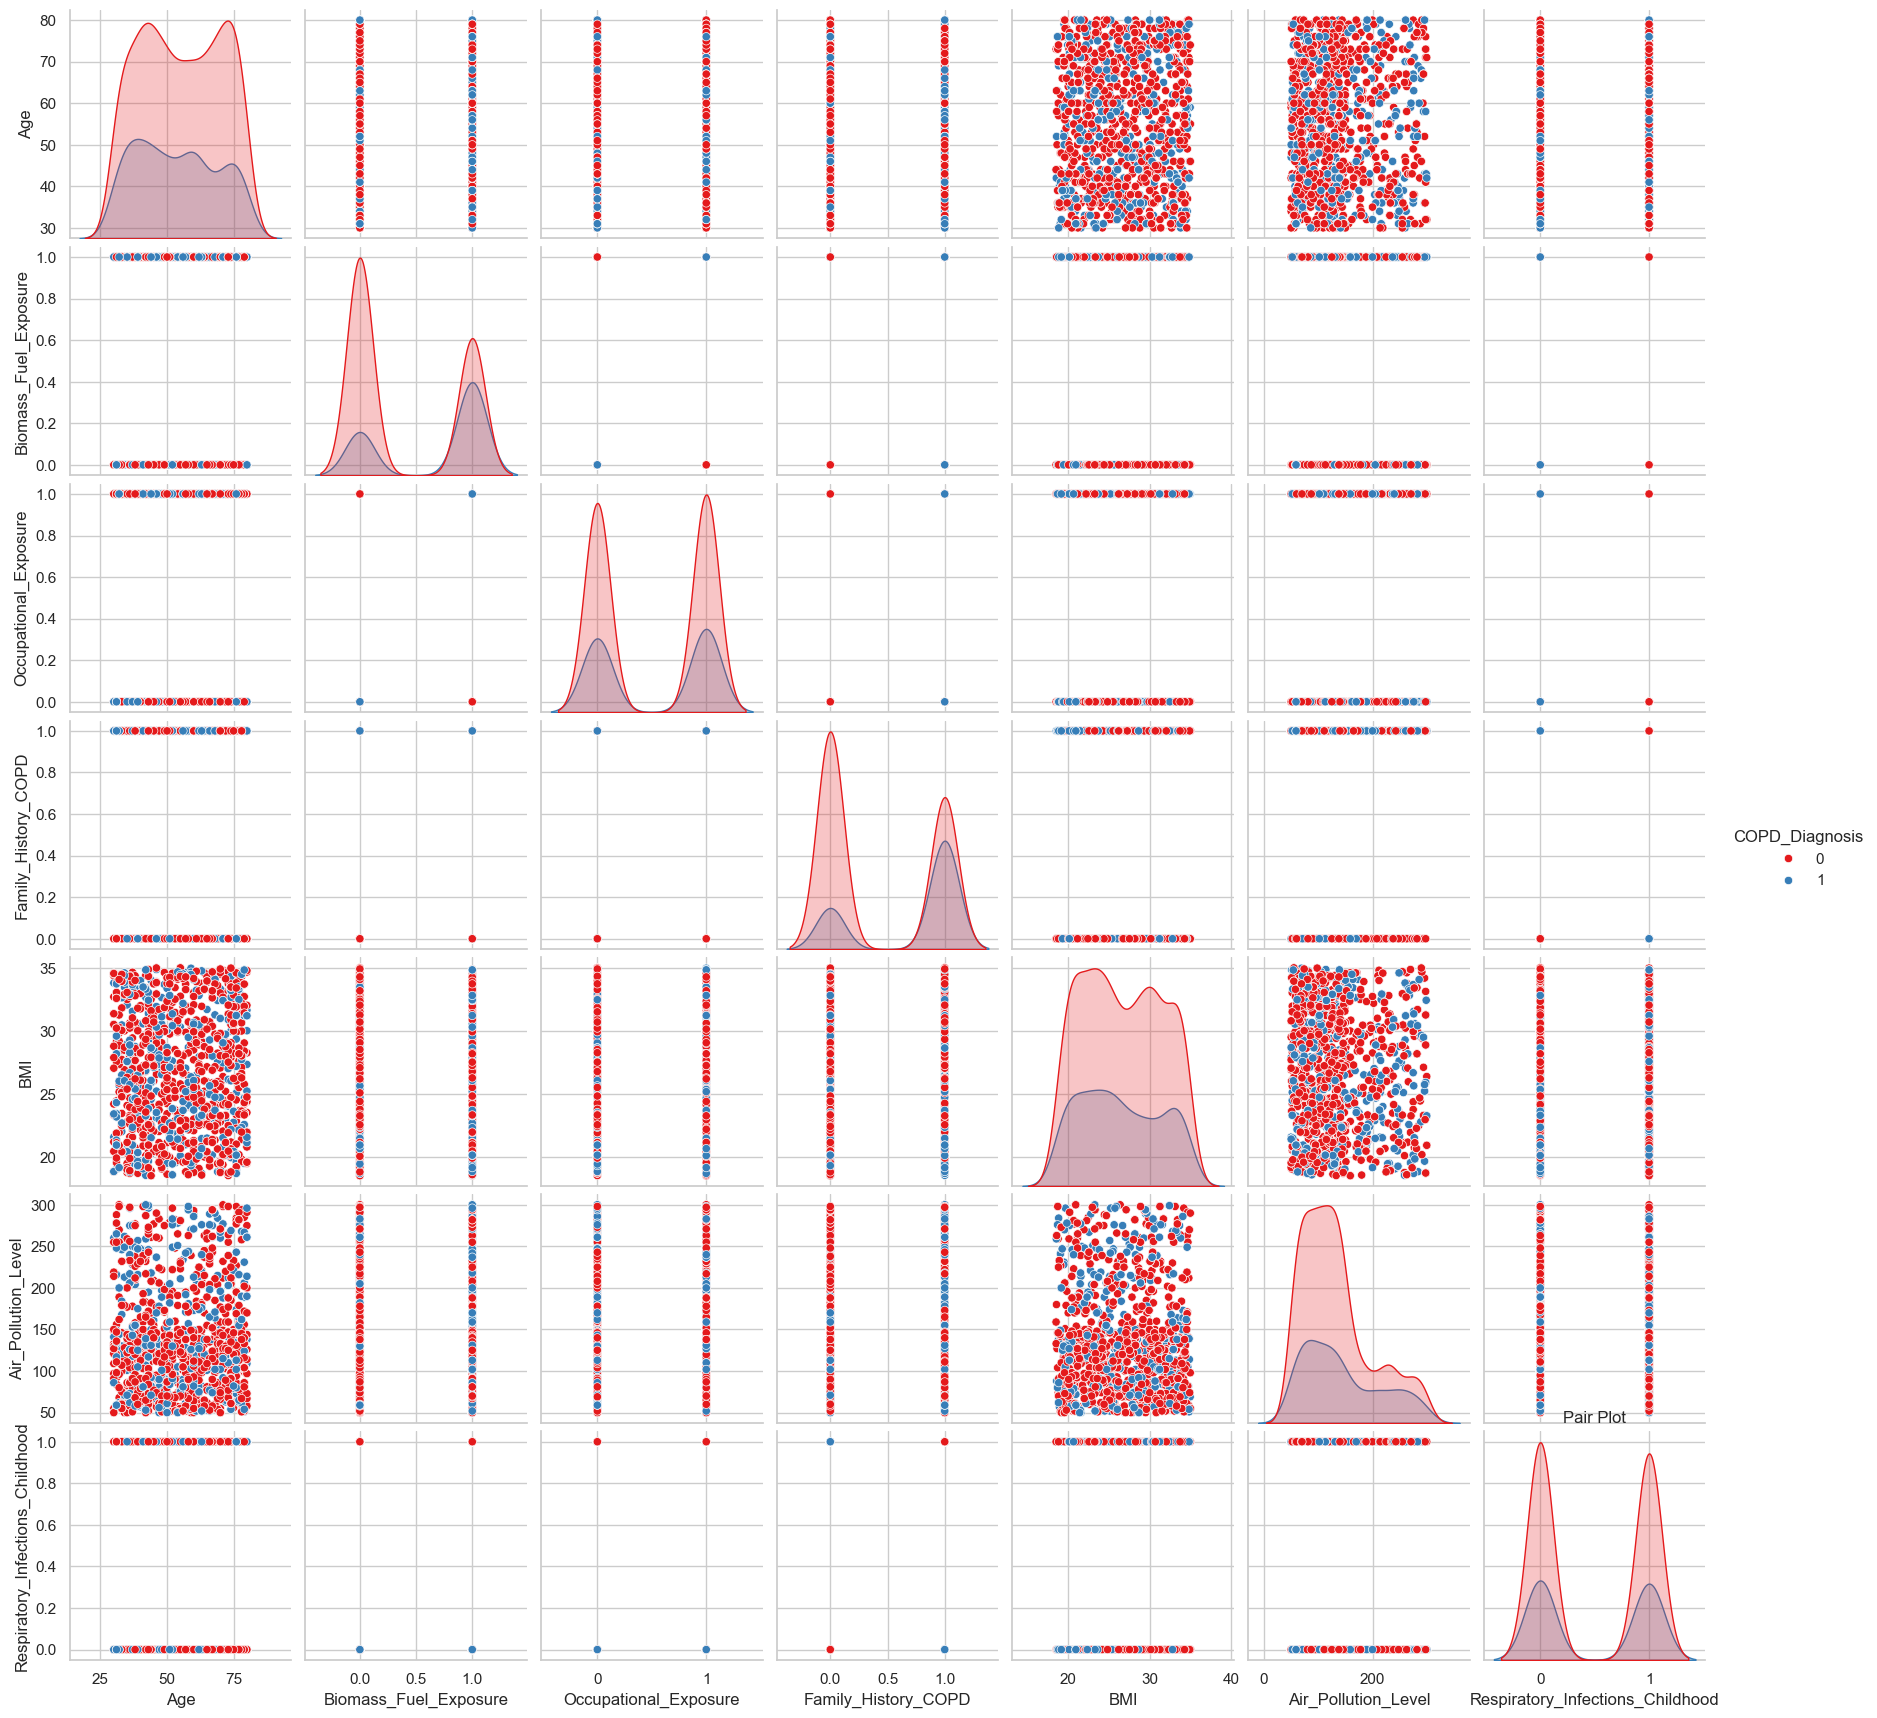

In [28]:
sns.pairplot(df, hue='COPD_Diagnosis', diag_kind='kde', palette='Set1')
plt.title("Pair Plot")
plt.show()

# Insights from EDA
Risk factors for COPD: 
The dataset will likely show that individuals with smoking history, biomass fuel exposure, occupational hazards, and high air pollution levels are more prone to COPD.

Gender and Age: 
COPD could be more prevalent in older age groups, with possible gender differences depending on exposure to smoking or other environmental factors.

Environmental and genetic factors: 
The prevalence of COPD in areas with high air pollution or in individuals with a family history of COPD could provide deeper insight into both environmental and genetic influences on the disease.

Preventive focus: 
The data could emphasize the need for interventions targeting smoking cessation, improving air quality, and reducing exposure to biomass fuels.

# Model Development

In [29]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['COPD_Diagnosis'])
y = df['COPD_Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Training set size: 1440
Testing set size: 360


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


X = df[['Age', 'Gender', 'Smoking_Status', 'Biomass_Fuel_Exposure', 'Occupational_Exposure', 'Family_History_COPD', 'BMI', 'Location', 'Air_Pollution_Level', 'Respiratory_Infections_Childhood']]

y = df['COPD_Diagnosis']

# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[['Gender', 'Smoking_Status', 'Location']])

# Convert the encoded data back to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(['Gender', 'Smoking_Status', 'Location']))

# Drop the original categorical columns and join the encoded columns
X = X.drop(['Gender', 'Smoking_Status', 'Location'], axis=1)
X = X.join(X_encoded_df)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1260, 22)
X_test shape: (540, 22)
y_train shape: (1260,)
y_test shape: (540,)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Fit the models on the training data
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Calculate accuracy scores
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

# Print the accuracy scores
print("Accuracy of Logistic Regression:", accuracy_log_reg)
print("Accuracy of Decision Tree:", accuracy_decision_tree)
print("Accuracy of Random Forest:", accuracy_random_forest)

Accuracy of Logistic Regression: 0.9907407407407407
Accuracy of Decision Tree: 1.0
Accuracy of Random Forest: 0.9944444444444445


c:\Users\awasthi\Documents\Final_Project_COPD_Risk_Factors_Nepal\COPD_Project\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the feature matrix X
X = df[['Age', 'Gender', 'Smoking_Status', 'Biomass_Fuel_Exposure', 'Occupational_Exposure', 'Family_History_COPD', 'BMI', 'Location', 'Air_Pollution_Level', 'Respiratory_Infections_Childhood']]

# Define the target vector y
y = df['COPD_Diagnosis']

# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[['Gender', 'Smoking_Status', 'Location']])

# Convert the encoded data back to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(['Gender', 'Smoking_Status', 'Location']))

# Drop the original categorical columns and join the encoded columns
X = X.drop(['Gender', 'Smoking_Status', 'Location'], axis=1)
X = X.join(X_encoded_df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Innitialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy}")

Accuracy of Logistic Regression: 0.9814814814814815
Accuracy of Decision Tree: 1.0
Accuracy of Random Forest: 0.9925925925925926


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [34]:


# Innitialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier()
}

# Train the models and save them
for name, model in models.items():
    model.fit(X_train, y_train)

    # Save the models
    with open(f'{name.replace(" ", "_")}.pkl', 'wb') as f:
        pickle.dump(model, f)
    print(f"{name} model trained and saved.")

print("Model training completed")

Logistic Regression model trained and saved.
Decision Tree model trained and saved.
Random Forest model trained and saved.
Model training completed


In [35]:
# Import the neccesary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
# Model Evaluation (Precision, Recall, F1-Score)
from sklearn.metrics import classification_report

# Evaluate all models
print("\nLogistic Regression Evaluation:\n", classification_report(y_test, y_pred_log_reg))
print("\nDecision Tree Evaluation:\n", classification_report(y_test, y_pred_decision_tree))
print("\nRandom Forest Evaluation:\n", classification_report(y_test, y_pred_random_forest))



Logistic Regression Evaluation:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       359
           1       0.98      0.99      0.99       181

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540


Decision Tree Evaluation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       181

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540


Random Forest Evaluation:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       359
           1       1.00      0.98      0.99       181

    accuracy                           0.99       540
   macro avg       1.00      0.99     

In [37]:
#Random Forest Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
best_rf = grid_search.best_estimator_
print("Best Parameters from GridSearch:", grid_search.best_params_)

# Evaluate the tuned Random Forest
y_pred_refined_rf = best_rf.predict(X_test)
print("\nRefined Random Forest Evaluation:\n", classification_report(y_test, y_pred_refined_rf))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters from GridSearch: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Refined Random Forest Evaluation:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       359
           1       1.00      0.99      0.99       181

    accuracy                           1.00       540
   macro avg       1.00      0.99      1.00       540
weighted avg       1.00      1.00      1.00       540



In [38]:
import pickle

# Save the best Random Forest model
with open('Best_Random_Forest_Model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)
print("Best model saved as 'Best_Random_Forest_Model.pkl'.")


Best model saved as 'Best_Random_Forest_Model.pkl'.


# Conclusion: Best Algorithm Recommendation
Random Forest with hyperparameter tuning will likely perform the best, especially given its flexibility and ability to avoid overfitting compared to Decision Tree.

Logistic Regression is simpler and interpretable, but Random Forest can capture more complex relationships in this case.
Thus, I recommend Random Forest as the best algorithm, especially after GridSearchCV tuning

# Model Validation on Unseen Test Dataset:

In [39]:
# Step 1: Model Validation on Unseen Test Dataset

import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the best saved Random Forest model
with open('Best_Random_Forest_Model.pkl', 'rb') as f:
    best_rf = pickle.load(f)

# Validate the model on the unseen test data
y_pred_test = best_rf.predict(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print the results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Confusion Matrix:\n{test_conf_matrix}")


Test Accuracy: 0.9963
Test Precision: 1.0000
Test Recall: 0.9890
Test F1 Score: 0.9944
Confusion Matrix:
[[359   0]
 [  2 179]]


In [40]:
#Step 2: Cross-Dataset Validation

# Assuming the new dataset is available as 'new_dataset.csv'

#new_df = pd.read_csv('/path_to_new_dataset/new_dataset.csv')

# Ensure the same preprocessing steps (handling categorical columns)
#X_new = new_df[['Age', 'Gender', 'Smoking_Status', 'Biomass_Fuel_Exposure', 'Occupational_Exposure', 
#               'Family_History_COPD', 'BMI', 'Location', 'Air_Pollution_Level', 'Respiratory_Infections_Childhood']]
#y_new = new_df['COPD_Diagnosis']

# One-hot encode categorical columns as before
#X_new_encoded = encoder.transform(X_new[['Gender', 'Smoking_Status', 'Location']])
#X_new_encoded_df = pd.DataFrame(X_new_encoded.toarray(), columns=encoder.get_feature_names_out(['Gender', 'Smoking_Status', 'Location']))

# Drop original categorical columns and join encoded columns
#X_new = X_new.drop(['Gender', 'Smoking_Status', 'Location'], axis=1)
#X_new = X_new.join(X_new_encoded_df)

# Test the model on this new dataset
#y_pred_new = best_rf.predict(X_new)

# Evaluate the model on the new dataset
#new_accuracy = accuracy_score(y_new, y_pred_new)
#new_precision = precision_score(y_new, y_pred_new)
#new_recall = recall_score(y_new, y_pred_new)
#new_f1 = f1_score(y_new, y_pred_new)
#new_conf_matrix = confusion_matrix(y_new, y_pred_new)

# Print the results
#print(f"New Dataset Accuracy: {new_accuracy:.4f}")
#print(f"New Dataset Precision: {new_precision:.4f}")
#print(f"New Dataset Recall: {new_recall:.4f}")
#print(f"New Dataset F1 Score: {new_f1:.4f}")
#print(f"New Dataset Confusion Matrix:\n{new_conf_matrix}")


#### Model Validation tests how well your trained model generalizes on unseen data (test set).

####  Cross-Dataset Validation helps check if the model can generalize to entirely different populations or datasets, ensuring robustness across different demographics or regions.

#  Model Deployment

In [43]:
encoder_path = os.path.join(os.getcwd(), 'models', 'encoder.pkl')


In [44]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pickle

# Load the dataset
df = pd.read_csv(r'C:\Users\awasthi\Documents\Final_Project_COPD_Risk_Factors_Nepal\COPD_Project\COPD_Data_Nepal.csv')

# Specify the categorical columns
categorical_columns = ['Gender', 'Smoking_Status', 'Location']

# Train the encoder
encoder = OneHotEncoder(sparse_output=False)  # For newer versions of sklearn, `sparse=False` has changed to `sparse_output=False`
encoder.fit(df[categorical_columns])

# Save the encoder to a pickle file
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

print("Encoder has been saved to 'encoder.pkl'.")


Encoder has been saved to 'encoder.pkl'.


In [45]:
import os
print("Encoder saved in directory:", os.getcwd())


Encoder saved in directory: c:\Users\awasthi\Documents\Final_Project_COPD_Risk_Factors_Nepal\COPD_Project


In [47]:
# Load the saved encoder in your Flask app
encoder_path = os.path.join(os.getcwd(), 'encoder.pkl')

if os.path.exists(encoder_path):
    with open(encoder_path, 'rb') as f:
        encoder = pickle.load(f)
else:
    raise FileNotFoundError(f"Encoder file not found: {encoder_path}")
